<a href="https://colab.research.google.com/github/saima8/Deep-Learning/blob/main/Keras_Syntax_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

In [ ]:
df = pd.read_csv('/content/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


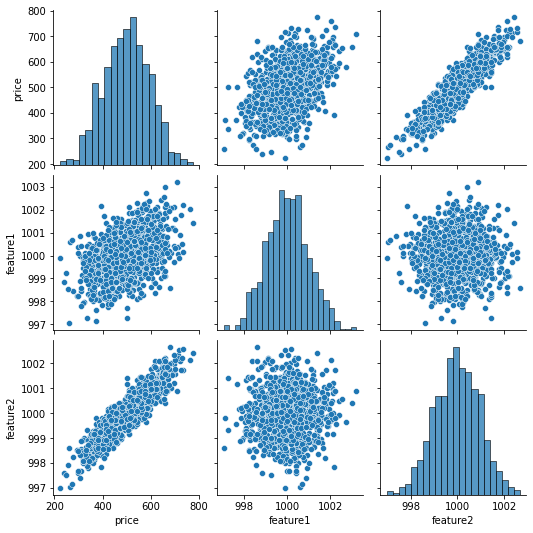

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['feature1', 'feature2']].values
y = df['price'].values

In [ ]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(670, 2)

In [ ]:
X_test.shape

(330, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.max())
print(X_train.min())

1.0
0.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# help(Sequential)

In [ ]:
# model = Sequential([Dense(4,activation='relu'), Dense(2, activation='relu'), Dense(1)])

In [ ]:
#Alternate way 

model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 1s 1ms/step - loss: 256655.3750
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 256551.9688
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 256452.9219
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 256346.2969
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 256233.3438
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 256113.3906
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 255985.0469
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 255847.9062
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 255702.6562
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 255548.6562
Epoch 11/250
21/21 [==============================] - 0s 1ms/step - loss: 255380.8906
Epoch 12/250
21/21 [==============================] - 0s 1ms/st

In [ ]:
loss_df = pd.DataFrame(model.history.history)
#loss history

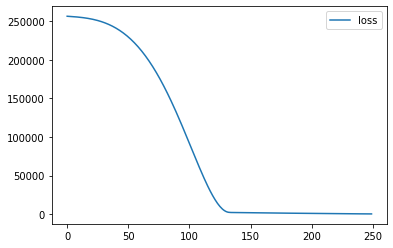

In [ ]:
loss_df.plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)
#mean squarred error, models loss on test sets

263.18402099609375

In [ ]:
model.evaluate(X_train, y_train, verbose=0)

263.0751037597656

In [ ]:
test_predictions = model.predict(X_test)
test_predictions

array([[422.22153],
       [606.78845],
       [582.30884],
       [558.6436 ],
       [380.4281 ],
       [567.9187 ],
       [506.20895],
       [471.3006 ],
       [539.3725 ],
       [462.2214 ],
       [597.07245],
       [552.71075],
       [433.2112 ],
       [423.12622],
       [639.6846 ],
       [451.84918],
       [516.9816 ],
       [629.7962 ],
       [636.47424],
       [561.35547],
       [357.45825],
       [455.10062],
       [399.52908],
       [400.1876 ],
       [557.99396],
       [591.0784 ],
       [528.3571 ],
       [442.16476],
       [628.3896 ],
       [433.21646],
       [457.30414],
       [489.77246],
       [450.91382],
       [651.9738 ],
       [444.61594],
       [428.8622 ],
       [513.65314],
       [545.74835],
       [503.5426 ],
       [405.18964],
       [604.6015 ],
       [434.46164],
       [592.3065 ],
       [463.04895],
       [503.82617],
       [581.3075 ],
       [652.5341 ],
       [497.73758],
       [353.01428],
       [489.12418],


In [ ]:
test_predictions = pd.Series(test_predictions.reshape(330,))


In [ ]:
test_predictions.shape

(330, 1)

**Choosing an optimizer and loss**

keep in mind what kind of problem you are trying to solve:

# For a multi-class classification problem
model.compile(optimizer= 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy')

# For a binary classification problem
model.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['accuracy')

# For a mean squarred regression problem
model.compile(optimizer= 'rmsprop', loss='mse')